In [1]:
import json
import os
import shutil




In [4]:
train_files = os.listdir("/home/lxj/dataset/xiehe/imgs/train")

In [6]:
for path in train_files:
    source_path  = os.path.join("/home/lxj/dataset/xiehe/imgs/train",path)
    destination_path = os.path.join('/home/lxj/dataset/coco_xiehe/train/images',path)

    shutil.copyfile(source_path, destination_path)



In [7]:
test_files = os.listdir("/home/lxj/dataset/xiehe/imgs/test")

In [8]:
for path in test_files:
    source_path  = os.path.join("/home/lxj/dataset/xiehe/imgs/test",path)
    destination_path = os.path.join('/home/lxj/dataset/coco_xiehe/train/images',path)

    shutil.copyfile(source_path, destination_path)

In [9]:
val_files = os.listdir("/home/lxj/dataset/xiehe/imgs/val")

In [10]:
for path in val_files:
    source_path  = os.path.join("/home/lxj/dataset/xiehe/imgs/val",path)
    destination_path = os.path.join('/home/lxj/dataset/coco_xiehe/val/images',path)

    shutil.copyfile(source_path, destination_path)

In [13]:
def get_bbox(point_list,width,height):
    #boundingbox from groudningdino is [left-up(x,y),bottom-right(x,y)],from 0 to 1
    min_x=1
    max_x=0
    min_y=1
    max_y=0
    
    for point in point_list:
        scaled_width = point[0]/width
        scaled_height = point[1]/height
        if scaled_width<min_x:
            min_x = scaled_width
        if scaled_width>max_x:
            max_x = scaled_width
        if scaled_height<min_y:
            min_y = scaled_height
        if scaled_height>max_y:
            max_y = scaled_height


    return [min_x,min_y,max_x,max_y]

In [14]:
def convert_coordinates(x1, y1, x2, y2):
    width = x2 - x1
    height = y2 - y1
    x_center = x1 + width / 2
    y_center = y1 + height / 2
    return [x_center, y_center, width, height]


In [11]:
anno_dir = "/home/lxj/dataset/xiehe/jsons/train"


In [15]:
anno_paths = os.listdir(anno_dir)
target_dir = "/home/lxj/dataset/coco_xiehe/train/labels"

In [16]:
with open("/home/lxj/dataset/xiehe/jsons/train/case_0001-Vid_20151214164256-frame_0019.json") as f:
    temp = json.load(f)

In [25]:
temp["shapes"]

[{'label': 'Sella floor',
  'points': [[977.4528301886793, 709.3396226415094],
   [884.0566037735849, 741.4150943396227],
   [779.3396226415094, 729.1509433962264],
   [685.9433962264152, 700.8490566037735],
   [634.0566037735849, 701.7924528301886],
   [579.3396226415094, 711.2264150943396],
   [462.35849056603774, 647.0754716981132],
   [469.90566037735846, 545.188679245283],
   [477.45283018867923, 452.7358490566038],
   [511.4150943396226, 385.7547169811321],
   [571.7924528301887, 333.86792452830184],
   [610.4716981132076, 301.7924528301886],
   [718.9622641509434, 307.4528301886792],
   [813.3018867924528, 287.64150943396226],
   [830.2830188679245, 282.92452830188677],
   [858.5849056603774, 277.2641509433962],
   [933.1132075471698, 317.8301886792452],
   [1034.056603773585, 337.64150943396226],
   [1070.8490566037735, 415.9433962264151],
   [1097.2641509433963, 518.7735849056604],
   [1068.9622641509434, 570.6603773584906],
   [1079.3396226415095, 614.0566037735849],
   [1061

In [33]:
str2int_map = {"Sella floor": 0, "Tuberculum sella": 1, "ICA prominence": 2, "Clival recess": 3, "Optic carotid recess": 4, "Optic prominence": 5}

In [34]:
anno_dir = "/home/lxj/dataset/xiehe/jsons/train"
anno_paths = os.listdir(anno_dir)
target_dir = "/home/lxj/dataset/coco_xiehe/train/labels"

for path in anno_paths:
    file_path = os.path.join(target_dir,path)
    file_path = file_path.split(".")[0]+".txt"
    ori_path = os.path.join(anno_dir,path)
    with open(ori_path,"r") as f:
        data = json.load(f)

        
    height = data["imageHeight"]
    width = data["imageWidth"]

    with open(file_path,"w") as file:
        for c,i in enumerate(data["shapes"]):
            if c < len(data["shapes"]):
                label = str2int_map[i["label"]]
                points = i["points"]
                bbox = get_bbox(points,width,height)
                converted_bbox = convert_coordinates(bbox[0],bbox[1],bbox[2],bbox[3])
                file.write(f"{label} {' '.join(map(str, converted_bbox))}\n")
            else:
                label = str2int_map[i["label"]]
                points = i["points"]
                bbox = get_bbox(points,width,height)
                converted_bbox = convert_coordinates(bbox[0],bbox[1],bbox[2],bbox[3])
                file.write(f"{label} {' '.join(map(str, converted_bbox))}")

In [35]:
anno_dir = "/home/lxj/dataset/xiehe/jsons/test"
anno_paths = os.listdir(anno_dir)
target_dir = "/home/lxj/dataset/coco_xiehe/train/labels"
for path in anno_paths:
    file_path = os.path.join(target_dir,path)
    file_path = file_path.split(".")[0]+".txt"
    ori_path = os.path.join(anno_dir,path)
    with open(ori_path,"r") as f:
        data = json.load(f)

        
    height = data["imageHeight"]
    width = data["imageWidth"]

    with open(file_path,"w") as file:
        for c,i in enumerate(data["shapes"]):
            if c < len(data["shapes"]):
                label = str2int_map[i["label"]]
                points = i["points"]
                bbox = get_bbox(points,width,height)
                converted_bbox = convert_coordinates(bbox[0],bbox[1],bbox[2],bbox[3])
                file.write(f"{label} {' '.join(map(str, converted_bbox))}\n")
            else:
                label = str2int_map[i["label"]]
                points = i["points"]
                bbox = get_bbox(points,width,height)
                converted_bbox = convert_coordinates(bbox[0],bbox[1],bbox[2],bbox[3])
                file.write(f"{label} {' '.join(map(str, converted_bbox))}")

In [38]:
file_dir = "/home/lxj/dataset/coco_xiehe/train/images"
files = os.listdir(file_dir)
target_dir = "/home/lxj/dataset/coco_xiehe/images/train"


In [39]:
for path in files:
    source_path  = os.path.join("/home/lxj/dataset/coco_xiehe/train/images",path)
    destination_path = os.path.join('/home/lxj/dataset/coco_xiehe/images/train',path)

    shutil.copyfile(source_path, destination_path)

In [40]:
file_dir = "/home/lxj/dataset/coco_xiehe/val/images"
files = os.listdir(file_dir)
target_dir = "/home/lxj/dataset/coco_xiehe/images/val"

In [41]:
for path in files:
    source_path  = os.path.join("/home/lxj/dataset/coco_xiehe/val/images",path)
    destination_path = os.path.join('/home/lxj/dataset/coco_xiehe/images/val',path)

    shutil.copyfile(source_path, destination_path)

In [43]:
file_dir = "/home/lxj/dataset/coco_xiehe/train/labels"
files = os.listdir(file_dir)
target_dir = "/home/lxj/dataset/coco_xiehe/labels/train"

In [44]:
for path in files:
    source_path  = os.path.join("/home/lxj/dataset/coco_xiehe/train/labels",path)
    destination_path = os.path.join("/home/lxj/dataset/coco_xiehe/labels/train",path)

    shutil.copyfile(source_path, destination_path)

In [45]:
file_dir = "/home/lxj/dataset/coco_xiehe/val/labels"
files = os.listdir(file_dir)
target_dir = "/home/lxj/dataset/coco_xiehe/labels/val"

In [46]:
for path in files:
    source_path  = os.path.join("/home/lxj/dataset/coco_xiehe/val/labels",path)
    destination_path = os.path.join("/home/lxj/dataset/coco_xiehe/labels/val",path)

    shutil.copyfile(source_path, destination_path)

In [ ]:
#segment

In [50]:
temp["shapes"][0]["points"]

[[977.4528301886793, 709.3396226415094],
 [884.0566037735849, 741.4150943396227],
 [779.3396226415094, 729.1509433962264],
 [685.9433962264152, 700.8490566037735],
 [634.0566037735849, 701.7924528301886],
 [579.3396226415094, 711.2264150943396],
 [462.35849056603774, 647.0754716981132],
 [469.90566037735846, 545.188679245283],
 [477.45283018867923, 452.7358490566038],
 [511.4150943396226, 385.7547169811321],
 [571.7924528301887, 333.86792452830184],
 [610.4716981132076, 301.7924528301886],
 [718.9622641509434, 307.4528301886792],
 [813.3018867924528, 287.64150943396226],
 [830.2830188679245, 282.92452830188677],
 [858.5849056603774, 277.2641509433962],
 [933.1132075471698, 317.8301886792452],
 [1034.056603773585, 337.64150943396226],
 [1070.8490566037735, 415.9433962264151],
 [1097.2641509433963, 518.7735849056604],
 [1068.9622641509434, 570.6603773584906],
 [1079.3396226415095, 614.0566037735849],
 [1061.4150943396226, 662.1698113207547],
 [1014.2452830188679, 687.6415094339623]]

In [52]:
anno_dir = "/home/lxj/dataset/xiehe/jsons/test"
anno_paths = os.listdir(anno_dir)
target_dir = "/home/lxj/dataset/coco_xiehe_segment/labels/train"
for path in anno_paths:
    file_path = os.path.join(target_dir,path)
    file_path = file_path.split(".")[0]+".txt"
    ori_path = os.path.join(anno_dir,path)
    with open(ori_path,"r") as f:
        data = json.load(f)

        
    height = data["imageHeight"]
    width = data["imageWidth"]

    with open(file_path,"w") as file:
        for c,i in enumerate(data["shapes"]):
            if c < len(data["shapes"]):
                label = str2int_map[i["label"]]
                points = i["points"]
                file.write(str(label) + ' ')
                for index,point in enumerate(points):
                    if index<len(points):
                        x = str(point[0]/width)
                        y = str(point[1]/height)
                        scaled_values = [x,y]
                        file.write(' '.join(scaled_values) + ' ')
                    else:
                        x = str(point[0]/width)
                        y = str(point[1]/height)
                        scaled_values = [x,y]
                        file.write(' '.join(scaled_values))
                file.write('\n')
            else:
                label = str2int_map[i["label"]]
                points = i["points"]
                file.write(label + ' ')
                for point in points:
                    if index<len(points):
                        x = str(point[0]/width)
                        y = str(point[1]/height)
                        scaled_values = [x,y]
                        file.write(' '.join(scaled_values) + ' ')
                    else:
                        x = str(point[0]/width)
                        y = str(point[1]/height)
                        scaled_values = [x,y]
                        file.write(' '.join(scaled_values))

In [53]:
anno_dir = "/home/lxj/dataset/xiehe/jsons/train"
anno_paths = os.listdir(anno_dir)
target_dir = "/home/lxj/dataset/coco_xiehe_segment/labels/train"
for path in anno_paths:
    file_path = os.path.join(target_dir,path)
    file_path = file_path.split(".")[0]+".txt"
    ori_path = os.path.join(anno_dir,path)
    with open(ori_path,"r") as f:
        data = json.load(f)

        
    height = data["imageHeight"]
    width = data["imageWidth"]

    with open(file_path,"w") as file:
        for c,i in enumerate(data["shapes"]):
            if c < len(data["shapes"]):
                label = str2int_map[i["label"]]
                points = i["points"]
                file.write(str(label) + ' ')
                for index,point in enumerate(points):
                    if index<len(points):
                        x = str(point[0]/width)
                        y = str(point[1]/height)
                        scaled_values = [x,y]
                        file.write(' '.join(scaled_values) + ' ')
                    else:
                        x = str(point[0]/width)
                        y = str(point[1]/height)
                        scaled_values = [x,y]
                        file.write(' '.join(scaled_values))
                file.write('\n')
            else:
                label = str2int_map[i["label"]]
                points = i["points"]
                file.write(label + ' ')
                for point in points:
                    if index<len(points):
                        x = str(point[0]/width)
                        y = str(point[1]/height)
                        scaled_values = [x,y]
                        file.write(' '.join(scaled_values) + ' ')
                    else:
                        x = str(point[0]/width)
                        y = str(point[1]/height)
                        scaled_values = [x,y]
                        file.write(' '.join(scaled_values))

In [54]:
anno_dir = "/home/lxj/dataset/xiehe/jsons/val"
anno_paths = os.listdir(anno_dir)
target_dir = "/home/lxj/dataset/coco_xiehe_segment/labels/val"
for path in anno_paths:
    file_path = os.path.join(target_dir,path)
    file_path = file_path.split(".")[0]+".txt"
    ori_path = os.path.join(anno_dir,path)
    with open(ori_path,"r") as f:
        data = json.load(f)

        
    height = data["imageHeight"]
    width = data["imageWidth"]

    with open(file_path,"w") as file:
        for c,i in enumerate(data["shapes"]):
            if c < len(data["shapes"]):
                label = str2int_map[i["label"]]
                points = i["points"]
                file.write(str(label) + ' ')
                for index,point in enumerate(points):
                    if index<len(points):
                        x = str(point[0]/width)
                        y = str(point[1]/height)
                        scaled_values = [x,y]
                        file.write(' '.join(scaled_values) + ' ')
                    else:
                        x = str(point[0]/width)
                        y = str(point[1]/height)
                        scaled_values = [x,y]
                        file.write(' '.join(scaled_values))
                file.write('\n')
            else:
                label = str2int_map[i["label"]]
                points = i["points"]
                file.write(label + ' ')
                for point in points:
                    if index<len(points):
                        x = str(point[0]/width)
                        y = str(point[1]/height)
                        scaled_values = [x,y]
                        file.write(' '.join(scaled_values) + ' ')
                    else:
                        x = str(point[0]/width)
                        y = str(point[1]/height)
                        scaled_values = [x,y]
                        file.write(' '.join(scaled_values))

In [2]:
from ultralytics import YOLO

# Load a model
#model = YOLO("/home/lxj/project/yolo/runs/detect/xiehe/weights/best.pt")  # pretrained YOLOv8n model
model = YOLO('/home/lxj/project/yolo/runs/detect/xiehe/weights/best.pt') 

# Run batched inference on a list of images
#results = model("/home/lxj/dataset/coco_xiehe/images/train/case_0197-Vid_20200102114441-frame_00240.jpg")  # return a list of Results objects


In [3]:
results = model.predict("/home/lxj/project/LLaVA-Plus/llava/serve/examples/test6.jpg", save=False)
# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs

image 1/1 /home/lxj/project/LLaVA-Plus/llava/serve/examples/test6.jpg: 384x640 1 Sella floor, 1 Clival recess, 63.6ms
Speed: 5.2ms preprocess, 63.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


: 

In [67]:
boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([7.], device='cuda:0')
conf: tensor([0.3746], device='cuda:0')
data: tensor([[1.1002e+03, 2.2854e+02, 1.6412e+03, 4.6799e+02, 3.7456e-01, 7.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (1080, 1920)
shape: torch.Size([1, 6])
xywh: tensor([[1370.7095,  348.2656,  540.9401,  239.4513]], device='cuda:0')
xywhn: tensor([[0.7139, 0.3225, 0.2817, 0.2217]], device='cuda:0')
xyxy: tensor([[1100.2394,  228.5399, 1641.1794,  467.9912]], device='cuda:0')
xyxyn: tensor([[0.5730, 0.2116, 0.8548, 0.4333]], device='cuda:0')

In [68]:
import numpy as np
data = np.load("/home/lxj/logs/llava-plus/temp.npy")

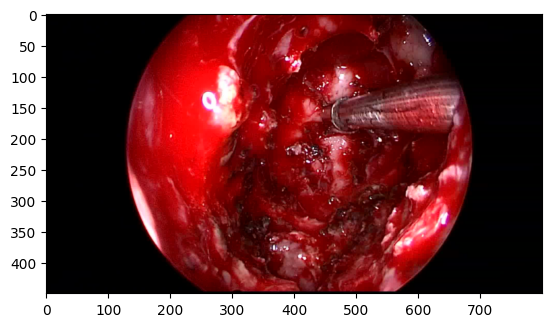

In [72]:
import matplotlib.pyplot as plt
plt.imshow(data)
plt.show()

In [75]:
model.predict("/home/lxj/dataset/coco_xiehe/images/train/case_0199-Vid_20050101005455-frame_05221.jpg")


image 1/1 /home/lxj/dataset/coco_xiehe/images/train/case_0199-Vid_20050101005455-frame_05221.jpg: 384x640 1 Sella floor, 1 Tuberculum sella, 1 Clival recess, 13.2ms
Speed: 4.3ms preprocess, 13.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Sella floor', 1: 'Tuberculum sella', 2: 'ICA prominence', 3: 'Clival recess', 4: 'Optic carotid recess', 5: 'Optic prominence'}
 obb: None
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],


In [80]:
data.shape

(450, 800, 3)

In [82]:
image.size

(800, 450)

In [83]:
results = model.predict(image)



0: 384x640 1 Sella floor, 1 Tuberculum sella, 1 Clival recess, 15.3ms
Speed: 4.0ms preprocess, 15.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


In [76]:
from PIL import Image

# 将NumPy数组转换为PIL Image对象
image = Image.fromarray(data)

# 保存图像为JPEG格式
image.save('output.jpg', 'JPEG')

In [78]:
results = model.predict("./output.jpg")
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs

    print(boxes)


image 1/1 /mnt/lxj/dataset/xiehe/output.jpg: 384x640 1 Sella floor, 1 Tuberculum sella, 1 Clival recess, 15.0ms
Speed: 3.8ms preprocess, 15.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 3., 1.], device='cuda:0')
conf: tensor([0.8498, 0.8439, 0.8072], device='cuda:0')
data: tensor([[352.7613, 151.5773, 517.1771, 302.1109,   0.8498,   0.0000],
        [322.6084, 265.2457, 558.8119, 425.4116,   0.8439,   3.0000],
        [400.6137,  80.7727, 506.4569, 172.6643,   0.8072,   1.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (450, 800)
shape: torch.Size([3, 6])
xywh: tensor([[434.9692, 226.8441, 164.4158, 150.5337],
        [440.7101, 345.3287, 236.2035, 160.1659],
        [453.5353, 126.7185, 105.8432,  91.8916]], device='cuda:0')
xywhn: tensor([[0.5437, 0.5041, 0.2055, 0.3345],
        [0.5509, 0.7674, 0.2953, 0.3559],
        [0.5669, 0.2816, 0.1323, 0.2042]], device='cuda:0')
